In [126]:
#Detecting the outliers

#1.summary statistics of outliers
import pandas as pd

data ={'score' : [10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 100]}
df = pd.DataFrame(data)

print(df.describe())

            score
count   11.000000
mean    23.090909
std     25.688342
min     10.000000
25%     13.500000
50%     16.000000
75%     18.500000
max    100.000000


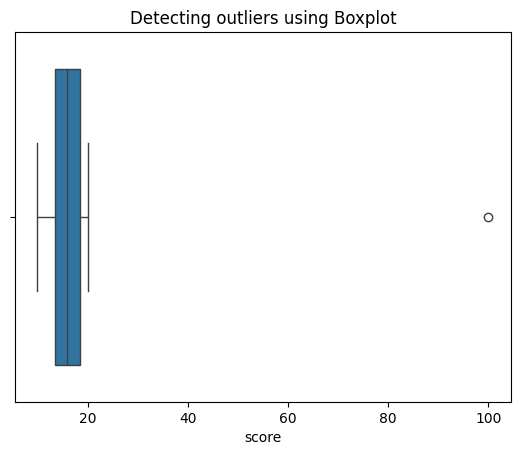

In [127]:
#using the boxplot method
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x=df['score'])
plt.title("Detecting outliers using Boxplot")
plt.show()

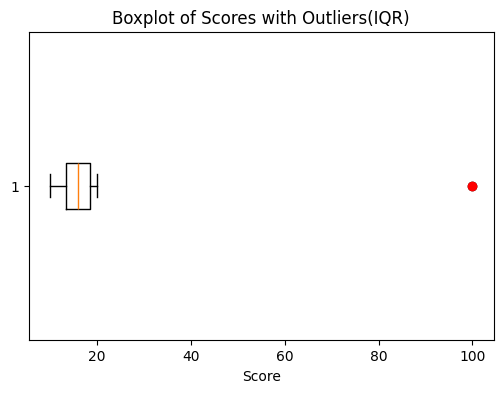

In [128]:
#interquartile range method
Q1 = df['score'].quantile(0.25)
Q3 = df['score'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df[(df['score'] < lower_limit) | (df['score'] > upper_limit)]
plt.figure(figsize=(6,4))
plt.boxplot(df['score'], vert=False)
plt.title("Boxplot of Scores with Outliers(IQR)")
plt.xlabel("Score")
for outlier in outliers['score']:
    plt.plot(outlier, 1, 'ro') 
    plt.show()

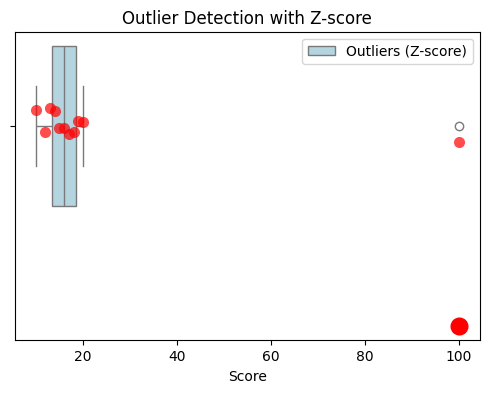

In [129]:
#using the Z-score method
import numpy as np
from scipy import stats
z_scores = stats.zscore(df['score'])
outliers_z = df[np.abs(z_scores) > 3]
plt.figure(figsize=(6,4))
sns.boxplot(x=df['score'] , color='lightblue')
sns.stripplot(x=df['score'], color='red', marker='o', size=8, alpha=0.7, jitter=True)
for outlier in outliers_z['score']:
    plt.plot(outlier, 1, 'ro' , markersize=12 ,label ='Outliers (Z-score)')
    plt.title("Outlier Detection with Z-score") 
    plt.xlabel("Score")
    plt.legend(['Outliers (Z-score)'])
    plt.show() 

In [130]:
#Handling the outliers
#1. Removw the the outliers
df_clean = df[(df['score'] >= lower_limit) & (df['score'] <= upper_limit)]
print("After removing the outliers:", df_clean)

After removing the outliers:    score
0     10
1     12
2     13
3     14
4     15
5     16
6     17
7     18
8     19
9     20


In [131]:
#cap outliers(winsorization)
df_capped = df.copy()
df_capped['score'] = np.where(df['score'] > upper_limit, upper_limit,np.where(df['score'] < lower_limit, lower_limit, df['score']))
print("After capping:\n", df_capped)‹

SyntaxError: invalid character '‹' (U+2039) (1750605997.py, line 4)

In [113]:
#trasforma outliers(it is also called log transformation)
df['log_score'] = np.log(df['score'])
print(df)

    score  log_score
0      10   2.302585
1      12   2.484907
2      13   2.564949
3      14   2.639057
4      15   2.708050
5      16   2.772589
6      17   2.833213
7      18   2.890372
8      19   2.944439
9      20   2.995732
10    100   4.605170
